In [1]:
# Standard Imports
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split

In [89]:
# Read the Data in Pandas DataFrame
sessions = pandas.read_csv("https://raw.githubusercontent.com/karthik1401/-JanataHack---E-Commerce-Analytics-ML-Hackathon/master/train.csv")

In [90]:
sessions.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,1/12/2014 15:58,1/12/2014 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [4]:
sessions.shape

(10500, 5)

In [5]:
sessions.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u20396,17/12/14 12:29,9/12/2014 14:58,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


#### This shows everything is of object type

In [6]:
sessions.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

#### Dependent columns Histogram Split

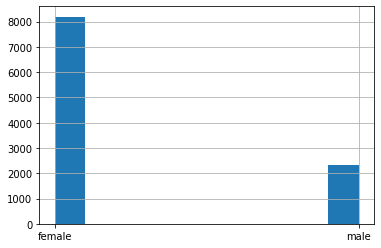

In [7]:
sessions['gender'].hist();

##### The histogram shows data is skewed.. 8000 Females X 2500 Males

#### Standardizing the DateTime fields

In [6]:
sessions['startTime'] = pandas.to_datetime(sessions['startTime'])

In [7]:
sessions.dtypes

session_id             object
startTime      datetime64[ns]
endTime                object
ProductList            object
gender                 object
dtype: object

In [8]:
sessions.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,2014-12-15 18:11:00,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,2014-12-16 14:35:00,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,2014-01-12 15:58:00,1/12/2014 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,2014-11-23 02:57:00,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,2014-12-17 16:44:00,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [7]:
sessions['endTime'] = pandas.to_datetime(sessions['endTime'])

#### Replacing the Dependent Column with 0's and 1's

* Female = 1
* Male = 0

In [8]:
sessions['gender'].replace(to_replace = 'female', value = '1', inplace = True)

In [10]:
sessions['gender'].replace(to_replace = 'male', value = '0', inplace = True)

#### Changing the Gender type to int32

In [11]:
sessions['gender'] = sessions['gender'].astype(dtype = 'int32')

In [16]:
sessions.dtypes

session_id             object
startTime      datetime64[ns]
endTime        datetime64[ns]
ProductList            object
gender                  int32
dtype: object

### Creating a seperate function to try to split ProductList in different rows in python

In [58]:
# Create a custom-made function to split the ProductList column and merge them into rows. 

def split_ProductList(sessions): #input is a dataframe
    
    # Spitting based on the semicolon, output will be pandas.series data expanded in columns.
    sess3 = sessions.ProductList.str.split(pat = ';', expand = True)
    
    # Creating a new dataframe
    df = pandas.concat(objs = (sessions['session_id'], 
                              sessions['startTime'], 
                              sessions['endTime'], 
                              sessions['gender'], 
                              sess3),
                  ignore_index = True,
                  axis = 1)
    
    # Return the new dataframe
    return df

In [59]:
train_pre = split_ProductList(sessions)

In [61]:
# Renaming the column names
train_pre.rename(columns = {
    0 : 'session_id',
    1 : 'startTime',
    2 : 'endTime',
    3 : 'gender'
}, inplace = True)

In [62]:
train_pre.head()

,session_id,startTime,endTime,gender,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,None,None,...,None,None,None,None,None,None,None,None,None,None
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,...,None,None,None,None,None,None,None,None,None,None
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1,A00002/B00001/C00020/D16944/,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [63]:
# Creating a new column which will record the hour the session was started
train_pre['Time'] = train_pre['startTime'].dt.hour

In [64]:
# Creating a new column which will record the session duration
train_pre['SessionTime'] = train_pre['endTime'] - train_pre['startTime']

In [65]:
# Melting all the columns of ProductLists to a single column
df = pandas.melt(train_pre, id_vars = 
                 ['session_id', 'startTime', 'endTime', 'gender', 'SessionTime', 'Time'], 
           value_vars = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 
                 value_name = 'ProductList')

In [67]:
df.head()

,session_id,startTime,endTime,gender,SessionTime,Time,variable,ProductList
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,4,A00002/B00003/C00006/D28435/
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0,00:06:00,14,4,A00001/B00009/C00031/D29404/
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1,00:00:00,15,4,A00002/B00001/C00020/D16944/
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1,00:03:00,2,4,A00002/B00004/C00018/D10284/
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0,00:02:00,16,4,A00001/B00001/C00012/D30805/


In [69]:
# Removing the extra column that was created as part of that. 
df.drop(labels = 'variable', axis = 1, inplace = True)

In [70]:
df.head()

,session_id,startTime,endTime,gender,SessionTime,Time,ProductList
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,A00002/B00003/C00006/D28435/
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0,00:06:00,14,A00001/B00009/C00031/D29404/
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1,00:00:00,15,A00002/B00001/C00020/D16944/
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1,00:03:00,2,A00002/B00004/C00018/D10284/
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0,00:02:00,16,A00001/B00001/C00012/D30805/


In [71]:
df.shape

(378000, 7)

In [73]:
# we've so many rows with Nulls in ProductList column
df['ProductList'].isna().sum() 

354749

In [74]:
# Removing them
df.dropna(subset = ['ProductList'], axis = 0, inplace = True) 

In [75]:
df.shape

(23251, 7)

### Now, let's try Encoding of the variabe on ProductList

In [76]:
# Before trying encoding we need to split the X & Y

X = df.drop(labels = ['session_id', 'gender', 'startTime', 'endTime'], axis = 1)
y = df['gender']

In [77]:
X.head()

,SessionTime,Time,ProductList
0,00:01:00,18,A00002/B00003/C00006/D28435/
1,00:06:00,14,A00001/B00009/C00031/D29404/
2,00:00:00,15,A00002/B00001/C00020/D16944/
3,00:03:00,2,A00002/B00004/C00018/D10284/
4,00:02:00,16,A00001/B00001/C00012/D30805/


In [78]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
transformed_df = enc.fit_transform(X)

In [79]:
t_df = pandas.DataFrame(transformed_df)
t_df.head()

,0,1,2
0,17.0,18.0,8537.0
1,22.0,14.0,1357.0
2,16.0,15.0,2907.0
3,19.0,2.0,9756.0
4,18.0,16.0,170.0


**Let's try our Random Forest Classifier Now**

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Splitting them into Train and Testing

X_train, X_test, y_train, y_test = train_test_split(t_df, y, test_size = 0.2)

In [81]:
X_train.head()

,0,1,2
13791,19.0,20.0,11479.0
16804,17.0,13.0,14603.0
16911,24.0,19.0,1054.0
18605,26.0,15.0,11096.0
11636,18.0,19.0,12658.0


In [82]:
y_train.head()

17577    1
26546    1
26965    0
35447    1
13022    1
Name: gender, dtype: int32

In [83]:
len(X_train), len(X_test)

(18600, 4651)

In [84]:
# Building the model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Score the model

clf.score(X_test, y_test)

0.9047516663083208

In [85]:
# Evalulating further using Confusion Matrix
from sklearn.metrics import confusion_matrix

In [86]:
y_predicted = clf.predict(X_test)

confusion_matrix(y_test, y_predicted)

array([[ 720,  221],
       [ 222, 3488]], dtype=int64)